# XYZ Corp : predicting the probability of Loan defaulter using Classifier Model

# Content

1. Import Packages
2. Data Loading
3. Statistical Summary
4. Exploratory Data Analysis
        a. Missing Data Analysis
        b. Spliting Target Variable
        c. EDA on Independent variables
5. Feature Engineering
        a. Dummy Variables encoding
6. Datasets Preparation - 
        a. Train & Test (as per requirement)
        b. Train data (train & test set spliting)
        c. Scaling the Data
        d. Implementing SMOTE (Sampling Minority)
7. Model Building
        a. Running different classifier
        b. GridSearchCV (Hyper_tuning Parameters)
8. Final Model Building
        a. Test Data
        b. Train Data(For metrics Comparison)
9. Metrics Comparison

## 1. Import_Packages

In [1]:
#system packages for Set File Directory
import os
os.chdir("E:\project\Python\DATASET\Python")

In [2]:
#Libraries for basic manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Libraries for Model - preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from imblearn.over_sampling import SMOTE

In [4]:
#Libraries for Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#Libraries for Model Fine tuning
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RepeatedStratifiedKFold
#Libraries for Model Evaluation
from sklearn import metrics as m
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

<a id='load_data'></a>
## Data Loading

In [5]:
#Loading data to Python Kernel

loan = pd.read_csv("XYZCorp_LendingData.txt",sep="\t",low_memory=False,parse_dates=['issue_d'])

#Total rows and columns
loan.shape

(855969, 73)

In [6]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [8]:
##Information about data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           855969 non-null  int64         
 1   member_id                    855969 non-null  int64         
 2   loan_amnt                    855969 non-null  float64       
 3   funded_amnt                  855969 non-null  float64       
 4   funded_amnt_inv              855969 non-null  float64       
 5   term                         855969 non-null  object        
 6   int_rate                     855969 non-null  float64       
 7   installment                  855969 non-null  float64       
 8   grade                        855969 non-null  object        
 9   sub_grade                    855969 non-null  object        
 10  emp_title                    806526 non-null  object        
 11  emp_length                

## Statistical_Summary

In [9]:
#Statistical Summary about the Data
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


## Exploratory Data Analysis

### Missing Data Analysis

In [10]:
##Total number of null values for each column
null_values=loan.isnull().sum()
null_values

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [11]:
#Removing unwanted features
loan_d = loan.drop(['id', 'member_id','emp_title','title','zip_code','policy_code','addr_state'],axis=1)

In [12]:
#deleting variables having more than 700000 missing values 
lis=loan.isnull().sum()
for i in range(len(lis)):
    if lis[i]>700000:
        del loan_d[(lis.index[i])]

In [13]:
miss_val=loan_d.isna().sum()
miss_val

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
initial_list_status                 0
out_prncp   

In [14]:
loan_d.shape

(855969, 47)

<a id='Spliting_Target'></a>
## Spliting Target Variable

In [15]:
#Target Variable 
loan['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

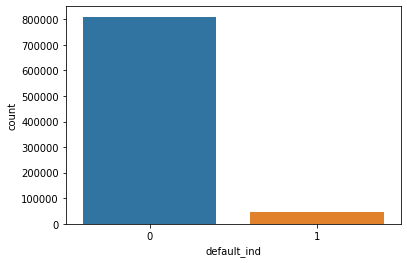

In [16]:
#target Variable
fig1=plt.figure()
sns.countplot(loan['default_ind'])

## Exploratory Data Analysis for Independent variables

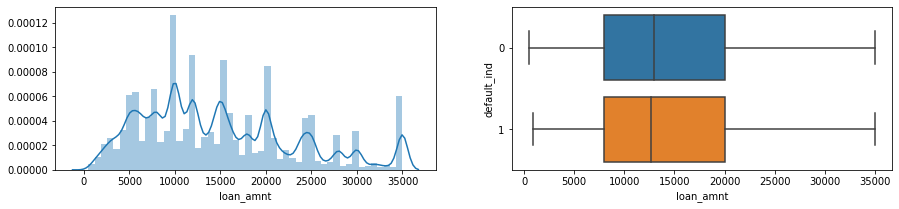

In [17]:
## Exploratory Data Analysis for Independent variables
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(loan_d['loan_amnt'],kde=True,ax=a)
sns.boxplot(y='default_ind',x='loan_amnt',data=loan_d,orient='h',ax=b)

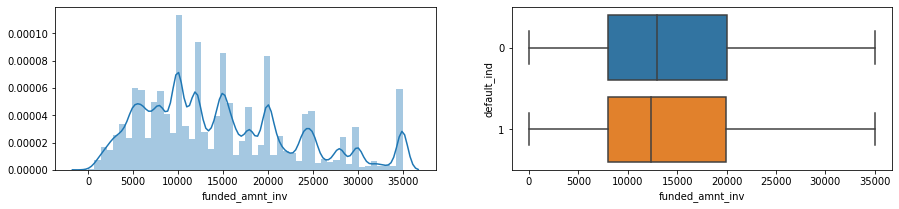

In [18]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(15,3))
sns.distplot(loan_d['funded_amnt_inv'],kde=True,ax=a)
sns.boxplot(y='default_ind',x='funded_amnt_inv',data=loan_d,orient='h',ax=b)

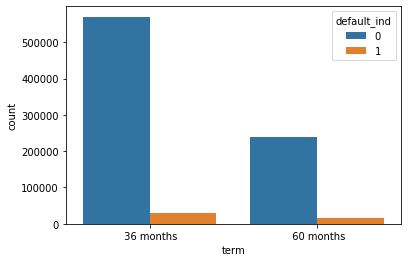

In [19]:
sns.countplot('term',hue='default_ind',data=loan_d)

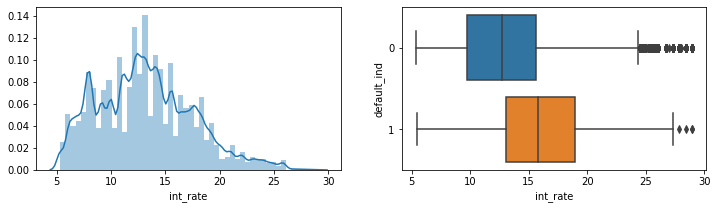

In [20]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(12,3))
sns.distplot(loan_d['int_rate'],kde=True,ax=a)
sns.boxplot(y='default_ind',x='int_rate',data=loan_d,orient='h',ax=b)

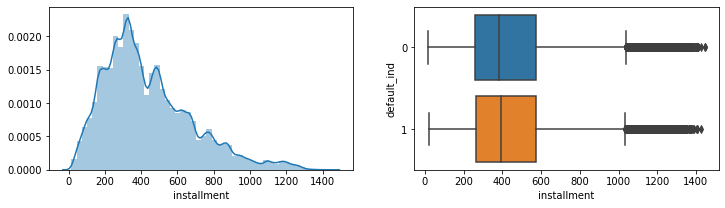

In [21]:
f,(a,b)=plt.subplots(nrows=1,ncols=2,figsize=(12,3))
sns.distplot(loan_d['installment'],kde=True,ax=a)
sns.boxplot(y='default_ind',x='installment',data=loan_d,orient='h',ax=b)

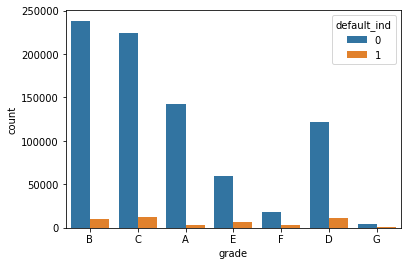

In [22]:
sns.countplot(loan_d['grade'],hue='default_ind',data=loan_d)

In [23]:
loan_d.emp_length.value_counts(dropna=False)

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
NaN           43061
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [24]:
## Imputing missing values with most repeated value
loan_d['emp_length'].fillna(value=loan_d['emp_length'].value_counts().index[0],axis=0,inplace=True)

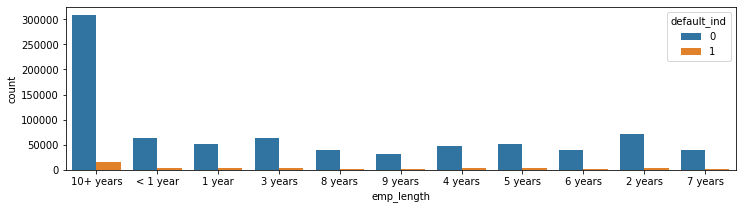

In [25]:
plt.figure(figsize=(12,3))
sns.countplot('emp_length',hue='default_ind',data=loan_d)

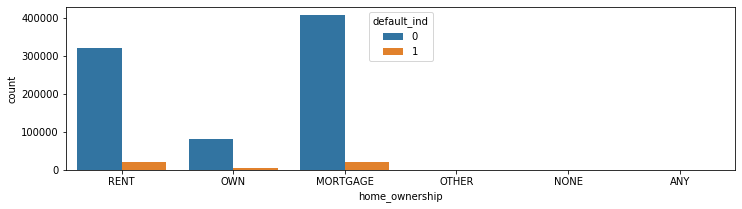

In [26]:
plt.figure(figsize=(12,3))
sns.countplot('home_ownership',hue='default_ind',data=loan_d)

In [27]:
##correlation between annual_inc and default_ind
loan_d[['annual_inc','default_ind']].corr()

,annual_inc,default_ind
annual_inc,1.000000,-0.037066
default_ind,-0.037066,1.000000


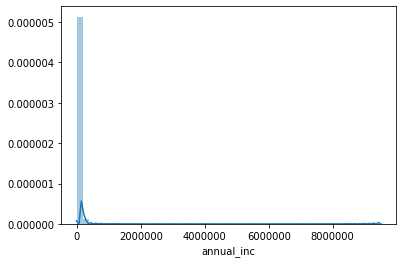

In [28]:
sns.distplot(loan_d['annual_inc'],kde=True)

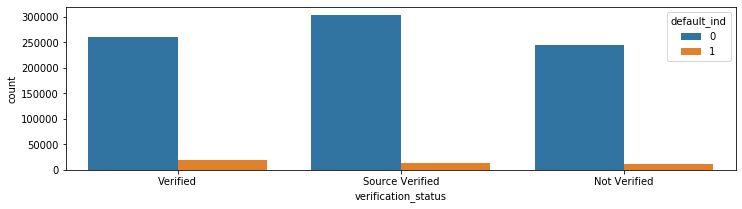

In [29]:
plt.figure(figsize=(12,3))
sns.countplot('verification_status',hue='default_ind',data=loan_d)

In [30]:
loan_d.corr()['default_ind']

loan_amnt                     -0.004907
funded_amnt                   -0.005797
funded_amnt_inv               -0.008209
int_rate                       0.155037
installment                    0.004753
annual_inc                    -0.037066
dti                            0.004429
delinq_2yrs                   -0.009186
inq_last_6mths                 0.074407
mths_since_last_delinq         0.001317
open_acc                      -0.021698
pub_rec                       -0.019607
revol_bal                     -0.020696
revol_util                     0.044497
total_acc                     -0.021087
out_prncp                     -0.225960
out_prncp_inv                 -0.225959
total_pymnt                   -0.039220
total_pymnt_inv               -0.040232
total_rec_prncp               -0.090336
total_rec_int                  0.046050
total_rec_late_fee             0.140760
recoveries                     0.475738
collection_recovery_fee        0.330764
last_pymnt_amnt               -0.087217


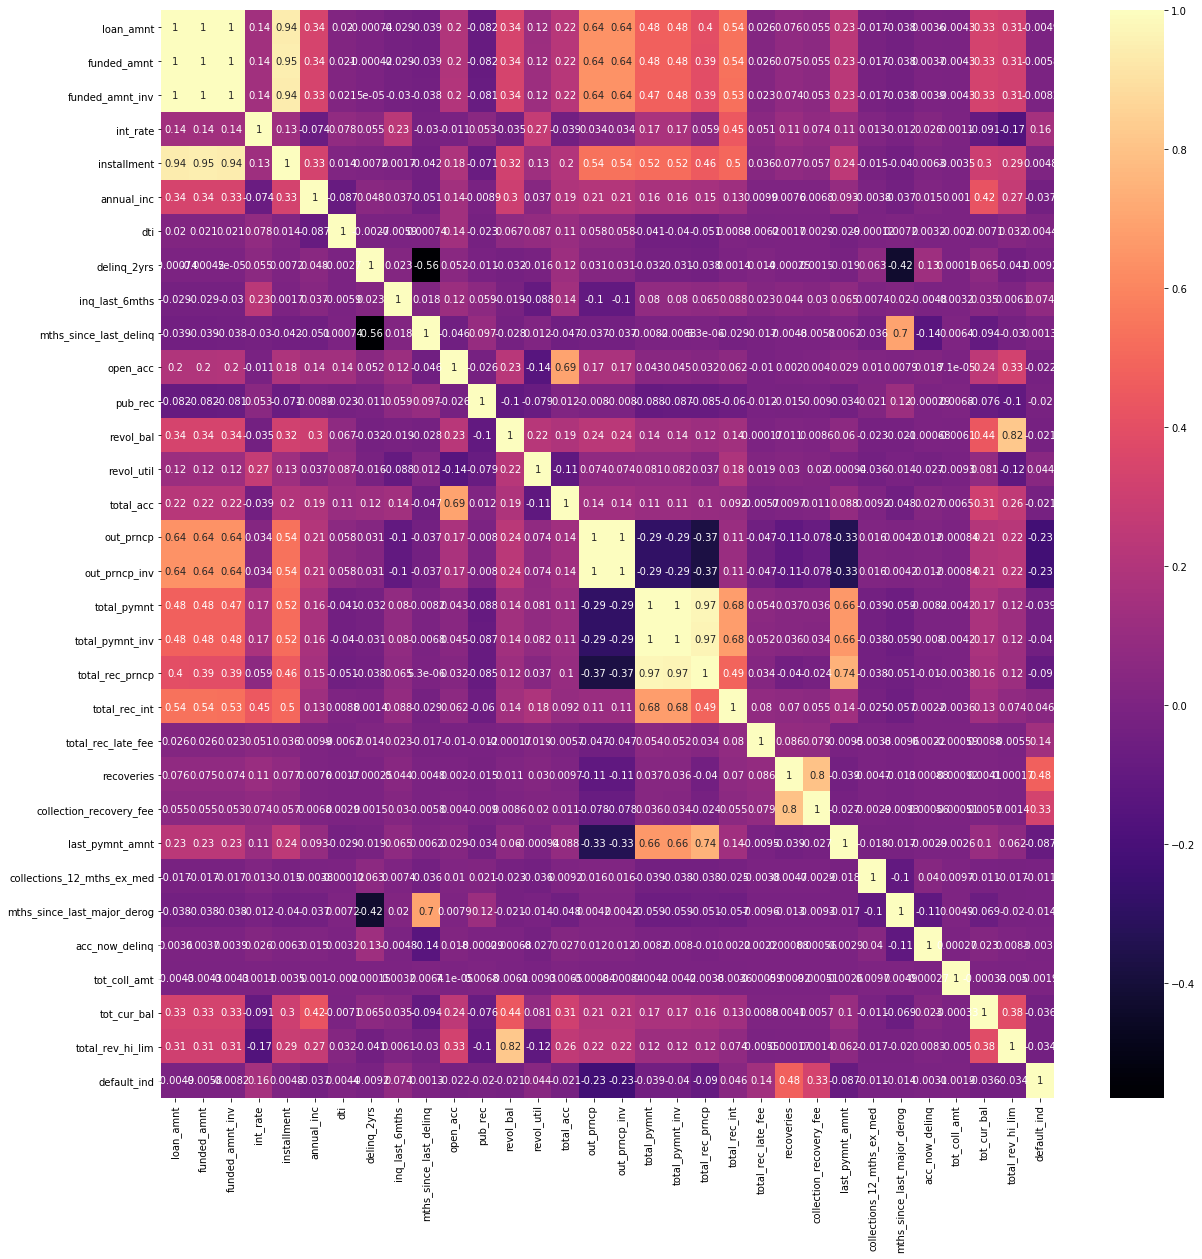

In [31]:
## Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(loan_d.corr(),annot=True,cmap='magma')

In [32]:
del loan['pymnt_plan']

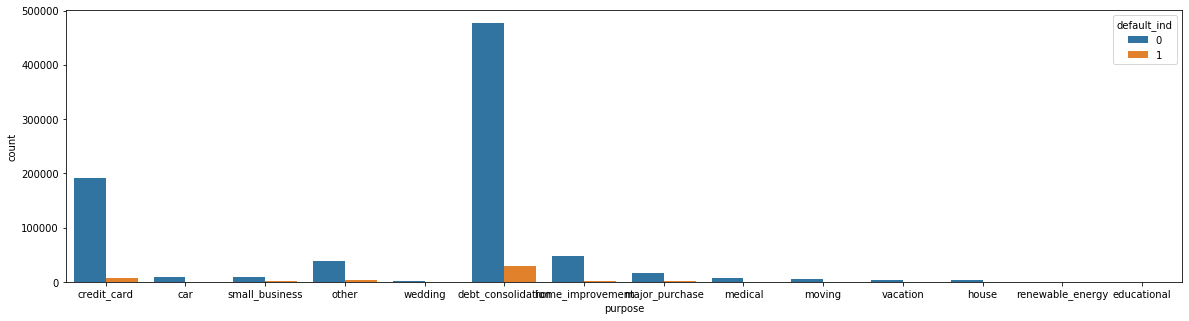

In [33]:
plt.figure(figsize=(20,5))
sns.countplot('purpose',hue='default_ind',data=loan_d)

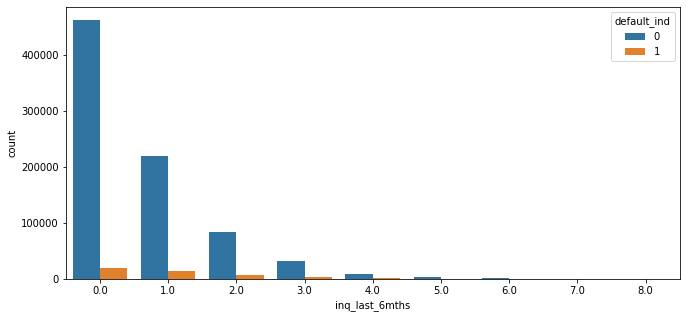

In [34]:
plt.figure(figsize=(11,5))
sns.countplot('inq_last_6mths',hue='default_ind',data=loan_d)

In [35]:
loan_d.mths_since_last_delinq.nunique()

155

In [36]:
del loan_d['mths_since_last_delinq']

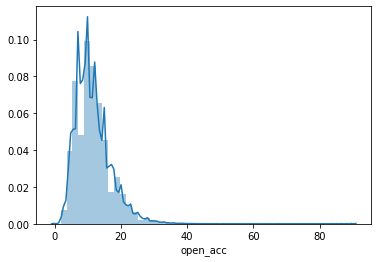

In [37]:
sns.distplot(loan_d['open_acc'],kde=True)

In [38]:
loan_d.earliest_cr_line.nunique()

697

In [39]:
del loan_d['earliest_cr_line']

In [40]:
##Imputing missing values with mean
loan_d['revol_util'].fillna(value=loan_d['revol_util'].mean(),inplace=True)

In [41]:
##finding correlation 
loan_d[['revol_bal','revol_util','total_acc','default_ind']].corr()

,revol_bal,revol_util,total_acc,default_ind
revol_bal,1.000000,0.217618,0.189322,-0.020696
revol_util,0.217618,1.000000,-0.114583,0.044475
total_acc,0.189322,-0.114583,1.000000,-0.021087
default_ind,-0.020696,0.044475,-0.021087,1.000000


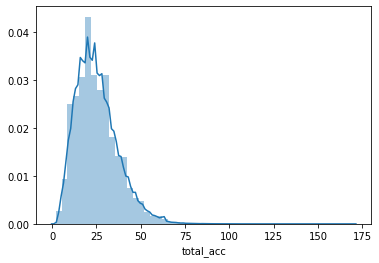

In [42]:
sns.distplot(loan_d['total_acc'],kde=True)

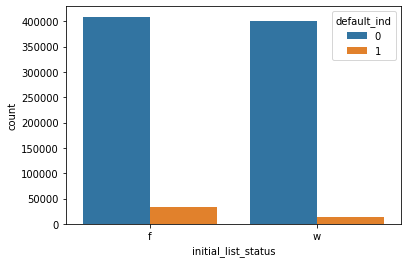

In [43]:
sns.countplot('initial_list_status',hue='default_ind',data=loan_d)

In [44]:
loan_d['last_pymnt_d'].nunique()

97

In [45]:
del loan_d['last_pymnt_d']

In [46]:
loan_d.next_pymnt_d.value_counts(dropna=False)

Feb-2016    534094
NaN         252971
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [47]:
##imputing missing values with most frequently occured values
loan_d['next_pymnt_d'].fillna(value=loan_d['next_pymnt_d'].value_counts().index[0],inplace=True,axis=0)

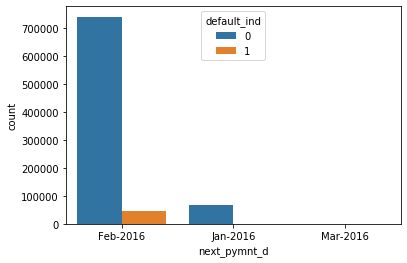

In [48]:
sns.countplot('next_pymnt_d',hue='default_ind',data=loan_d)

In [49]:
del loan_d['last_credit_pull_d']

In [50]:
del loan_d['collections_12_mths_ex_med']

In [51]:
del loan_d['mths_since_last_major_derog']

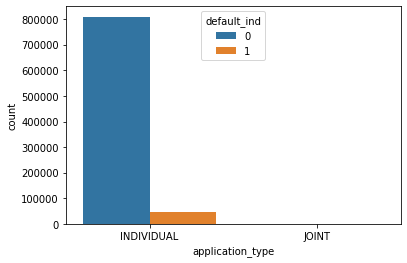

In [52]:
sns.countplot('application_type',hue='default_ind',data=loan_d)

In [53]:
##Finding correlation
loan_d[['acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim','dti','delinq_2yrs','default_ind']].corr()

,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,dti,delinq_2yrs,default_ind
acc_now_delinq,1.000000,0.000267,0.022804,0.008254,0.003227,0.130420,-0.003116
tot_coll_amt,0.000267,1.000000,-0.000331,-0.005025,-0.001995,0.000154,-0.001921
tot_cur_bal,0.022804,-0.000331,1.000000,0.384867,-0.007133,0.064618,-0.036335
total_rev_hi_lim,0.008254,-0.005025,0.384867,1.000000,0.032430,-0.040575,-0.033620
dti,0.003227,-0.001995,-0.007133,0.032430,1.000000,-0.002677,0.004429
delinq_2yrs,0.130420,0.000154,0.064618,-0.040575,-0.002677,1.000000,-0.009186
default_ind,-0.003116,-0.001921,-0.036335,-0.033620,0.004429,-0.009186,1.000000


In [54]:
##Due to low correlation with dependent variable,removing these variables
del loan_d['dti']
del loan_d['delinq_2yrs']
del loan_d['acc_now_delinq']
del loan_d['tot_coll_amt']

In [55]:
del loan_d['pymnt_plan']

In [56]:
#mean imputation
loan_d['tot_cur_bal'].fillna(value=loan_d['tot_cur_bal'].mean(),axis=0,inplace=True)

In [57]:
#mean imputaion
loan_d['total_rev_hi_lim'].fillna(value=loan_d['total_rev_hi_lim'].mean(),axis=0,inplace=True)

In [58]:
loan_d.shape

(855969, 36)

In [59]:
loan_d.nunique()

loan_amnt                    1368
funded_amnt                  1368
funded_amnt_inv              8818
term                            2
int_rate                      520
installment                 67349
grade                           7
sub_grade                      35
emp_length                     11
home_ownership                  6
annual_inc                  48163
verification_status             3
issue_d                       103
purpose                        14
inq_last_6mths                  9
open_acc                       77
pub_rec                        31
revol_bal                   72779
revol_util                   1339
total_acc                     134
initial_list_status             2
out_prncp                  236739
out_prncp_inv              254328
total_pymnt                494607
total_pymnt_inv            494744
total_rec_prncp            250385
total_rec_int              317683
total_rec_late_fee           5386
recoveries                  22627
collection_rec

In [60]:
#Dropping unwanted features
loan_d.drop(['sub_grade','funded_amnt','funded_amnt_inv'],inplace=True,axis=1)

In [61]:
loan_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   loan_amnt                855969 non-null  float64       
 1   term                     855969 non-null  object        
 2   int_rate                 855969 non-null  float64       
 3   installment              855969 non-null  float64       
 4   grade                    855969 non-null  object        
 5   emp_length               855969 non-null  object        
 6   home_ownership           855969 non-null  object        
 7   annual_inc               855969 non-null  float64       
 8   verification_status      855969 non-null  object        
 9   issue_d                  855969 non-null  datetime64[ns]
 10  purpose                  855969 non-null  object        
 11  inq_last_6mths           855969 non-null  float64       
 12  open_acc        

## Feature Engineering

### Creating dummy variables for Categorial Variables

In [62]:
##Creating dummy variables for object type variables
Term=pd.get_dummies(loan_d['term'],drop_first=True)
Grade=pd.get_dummies(loan_d['grade'],drop_first=True)
Emp_length=pd.get_dummies(loan_d['emp_length'],drop_first=True)
Home_ownership=pd.get_dummies(loan_d['home_ownership'],drop_first=True)
Verification=pd.get_dummies(loan_d['verification_status'],drop_first=True)
Purpose=pd.get_dummies(loan_d['purpose'],drop_first=True)
Inq_last_6mths=pd.get_dummies(loan_d['inq_last_6mths'],drop_first=True)
Initial_list=pd.get_dummies(loan_d['initial_list_status'],drop_first=True)
Next_pymnt_d=pd.get_dummies(loan_d['next_pymnt_d'],drop_first=True)
Application=pd.get_dummies(loan_d['application_type'],drop_first=True)

In [63]:
##Dropping old object type columns
loan_d.drop(['term','grade','emp_length','home_ownership','verification_status','purpose',
                'inq_last_6mths','initial_list_status','next_pymnt_d','application_type'],
               inplace=True,axis=1)

In [64]:
##joining dataframe with newly created dummy variables using concatenation function
loan_d=pd.concat([loan_d,Term,Grade,Emp_length,Home_ownership,Verification,Purpose,Inq_last_6mths,
                     Initial_list,Next_pymnt_d,Application],axis=1)

In [65]:
loan_d.shape

(855969, 72)

## Datasets Preparation for Model Building

In [66]:
train = loan_d[loan_d['issue_d'] < '2015-6-01']
test = loan_d[loan_d['issue_d'] >= '2015-6-01']

In [67]:
train.drop('issue_d',axis='columns',inplace=True)
test.drop('issue_d',axis='columns',inplace=True)

In [68]:
print(train.shape)
print(test.shape)

(598978, 71)
(256991, 71)


In [69]:
##Splitting train set into X_train and y_train
y=train['default_ind']

In [70]:
train.drop(['default_ind'],axis=1,inplace=True)

In [71]:
X = train

In [72]:
X.shape

(598978, 70)

In [73]:
##Splitting test set
test_target=test['default_ind']

In [74]:
test.drop(['default_ind'],axis=1,inplace=True)

In [75]:
test_features = test

In [76]:
print(test_features.shape)
print(test_target.shape)

(256991, 70)
(256991,)


## Spliting Train data into train & test set

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(449233, 70)
(449233,)
(149745, 70)
(149745,)


## Scaling the Datasets using MinMaxScaler

In [79]:
train_X = scaler.fit_transform(X_train)

print(train_X.shape)

(449233, 70)


In [80]:
test_features_f = scaler.fit_transform(test_features)

## Balancing minority variables using SMOTE techiques to balance the Datasets

In [81]:
np.unique(loan_d['default_ind'],return_counts=True)

(array([0, 1], dtype=int64), array([809502,  46467], dtype=int64))

In [82]:
os = SMOTE(random_state=1)

In [83]:
X_train_r,y_train_r = os.fit_sample(train_X,y_train)

In [84]:
print(X_train_r.shape,y_train_r.shape)
print(X_test.shape,y_test.shape)

(829246, 70) (829246,)
(149745, 70) (149745,)


## Model Building

### Attempting different classifier techniques, Implement GridSearchCV to identify better model

In [85]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(n_estimators=120,criterion='gini',
                          min_samples_leaf=3,oob_score=False,
                          max_features=2,
                          random_state=101),
        'params' : {
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
        'params': {
        }
    },
    'Naive_Bayes' : {
        'model': GaussianNB(),
        'params': {
        }
    }
}

,model,best_score,roc_auc_score,precision_score,recall_score,f1_score
0,random_forest,0.989390,0.892785,1.000000,0.504937,0.671041
1,logistic_regression,0.989705,0.794735,0.213721,0.850165,0.341575
2,GradientBoosting,0.994323,0.872437,0.990824,0.533085,0.693209
3,Naive_Bayes,0.918522,0.722501,1.000000,0.445003,0.615919


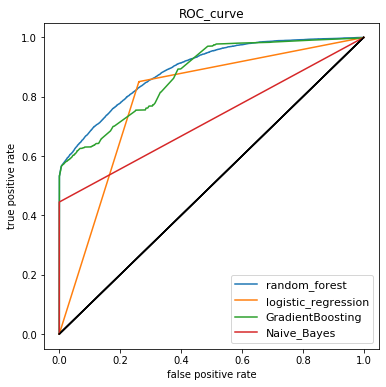

In [86]:
##Normal train & test
scores = []
best_estimators = {}
conf_matrix = dict()
cv_res = {}
for algo, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'],return_train_score=False)
    clf.fit(X_train_r, y_train_r)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    
       
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'roc_auc_score' : m.roc_auc_score(y_test, y_score),
        'precision_score': m.precision_score(y_test, y_pred),
        'recall_score': m.recall_score(y_test, y_pred),
        'f1_score': m.f1_score(y_test, y_pred),
        'accuracy':m.accuracy_score(y_test, y_pred)})
    
    conf_matrix[algo] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=True)
    best_estimators[algo] = clf.best_estimator_
    fpr, tpr, thresholds = m.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    cv_res[algo] = clf.cv_results_
    
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC_curve')
    plt.plot(fpr, tpr, label = algo )
    plt.legend(loc='lower right', prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
df = pd.DataFrame(scores,columns=['model','best_score','roc_auc_score', 'precision_score', 'recall_score','f1_score'])
df


#Banking industry is more concerned about Loan defaulters rather than non-defaulters,for predicting defaulter "Recall" is better metrics than other metrics used. After trying different classifier, identify that "Logistic Regression" has better "Recall_Score" than other classifier's.

## Final_Model Building

### Testing Logistic_Regression model with Test_Data

In [87]:
#Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='liblinear')

In [88]:
#Param_grid for Logistic Regression model
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
scoring = ['accuracy','recall','precision','f1']

grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)


In [89]:
logmodel_gs = GridSearchCV(logmodel,param_grid=grid,cv=cv,scoring='accuracy')

In [90]:
#Fitting model
logmodel_gs.fit(X_train_r,y_train_r)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [91]:
#Predicting the test set have to check
predictions=logmodel_gs.predict(test_features)

In [92]:
##Classification Report
print(m.classification_report(test_target,predictions))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62    256680
           1       0.00      0.78      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.61      0.31    256991
weighted avg       1.00      0.45      0.61    256991



In [93]:
##Calculating important metrics Precision score,Recall score,F1_Score
precision_score = m.precision_score(test_target,predictions)
Recall_score = m.recall_score(test_target,predictions)
F1_score = m.f1_score(test_target,predictions)
Recall_score

0.7845659163987139

In [94]:
##Calculating Accuracy
Accuracy = m.accuracy_score(test_target,predictions)
Accuracy

0.44531520559085724

In [95]:
##Calculating Balanced Accuracy
Balanced_Accuracy = m.balanced_accuracy_score(test_target,predictions)
Balanced_Accuracy

0.6147350386107642

In [96]:
##Calculating ROC_AUC Score
ROC_AUC_score = m.roc_auc_score(test_target,predictions)

In [97]:
##Calculating ROC_Curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_target,predictions)

In [98]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.55509584 1.        ]
[0.         0.78456592 1.        ]
[2 1 0]


In [99]:
optimal_idx = np.argmax(tpr - fpr)
optimal_idx

1

In [100]:
#Calculating threshold value for the model
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 1


Text(0.5, 1.0, 'roc_curve - LogisticRegression')

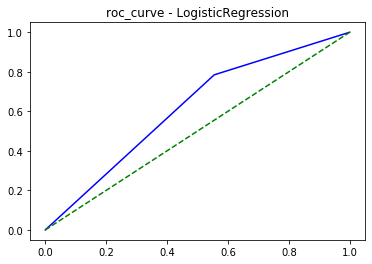

In [101]:
##Ploting the ROC Curve
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('roc_curve - LogisticRegression')

In [102]:
##Confusion Matrix
cm = m.confusion_matrix(test_target,predictions)
cm

array([[114198, 142482],
       [    67,    244]], dtype=int64)

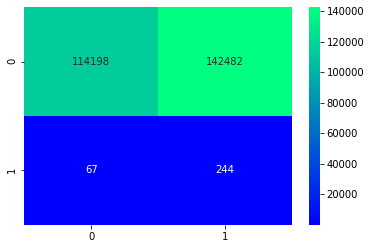

In [103]:
##Plotting Confusion Matrix
sns.heatmap(cm,annot=True,fmt='d',cmap='winter')

In [104]:
cm =  m.confusion_matrix(test_target,predictions)

In [105]:
##Assigning confusion matrix values(True negative,false positive,false negative,True Positive)
tn,fp,fn,tp = cm.ravel()

In [106]:
tn,fp,fn,tp

(114198, 142482, 67, 244)

In [107]:
## Calculating Prevalence
prevalence = (tn+fn) / (tn+fp+fn+tp)
(prevalence)

0.4446264655182477

In [108]:
##False Positive Rate | Type I error
False_positive_rate = fp / (fp + tn)
(False_positive_rate)

0.5550958391771856

In [109]:
#False Negative Rate | Type II error
False_negative_rate = fn / (tp + fn)
(False_negative_rate)

0.21543408360128619

In [110]:
#True Negative Rate | Specificity
Specificity = tn / (tn + fp)
(Specificity)

0.4449041608228144

In [111]:
#True Positive Rate | Recall | Sensitivity
Sensitivity = tp / (tp + fn)
(Sensitivity)

0.7845659163987139

In [112]:
logmodel_gs.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Using best Parameters to identify the Important Features

In [113]:
logmodel_f = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
logmodel_f.fit(X_train_r,y_train_r)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
##Predicting Test_data
pred=logmodel_f.predict(test_features)

In [116]:
##Calculating the Classification Report
print(m.classification_report(test_target,pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62    256680
           1       0.00      0.78      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.61      0.31    256991
weighted avg       1.00      0.45      0.61    256991



##Assign calculated Coefficient Values to make important Features contributing to the Model

In [117]:
imp_feat = logmodel_f.coef_[0]

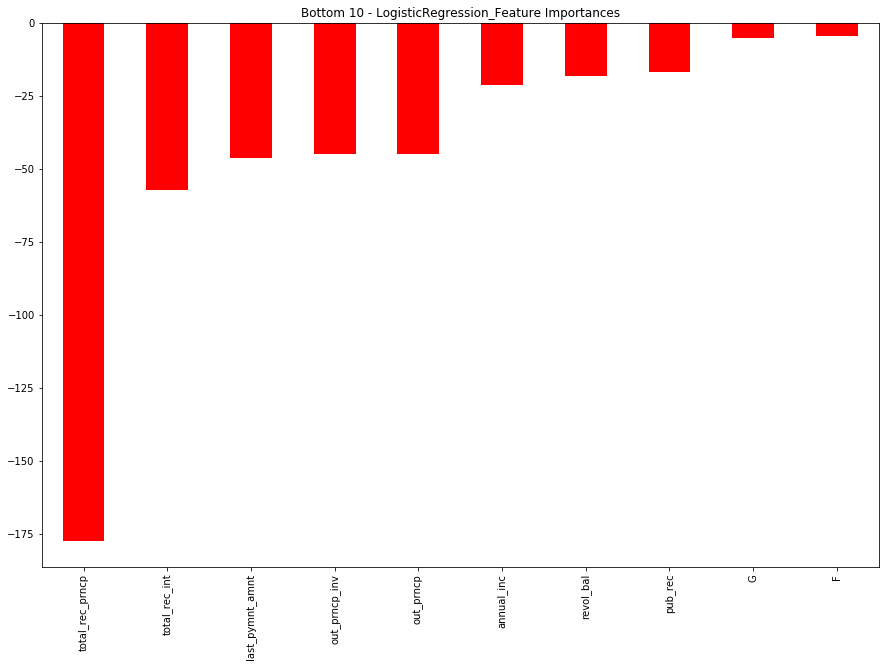

In [118]:
#Ploting Important Features
plt.figure(figsize=(15,10))
plt.title('Bottom 10 - LogisticRegression_Feature Importances')
feat_importances = pd.Series(logmodel_f.coef_[0], index=X_train.columns)
feat_impor = feat_importances.sort_values(ascending=True)
#feat_impor.nlargest(16).plot(kind='bar',color='m')
feat_impor.nsmallest(10).plot(kind='bar',color='r')

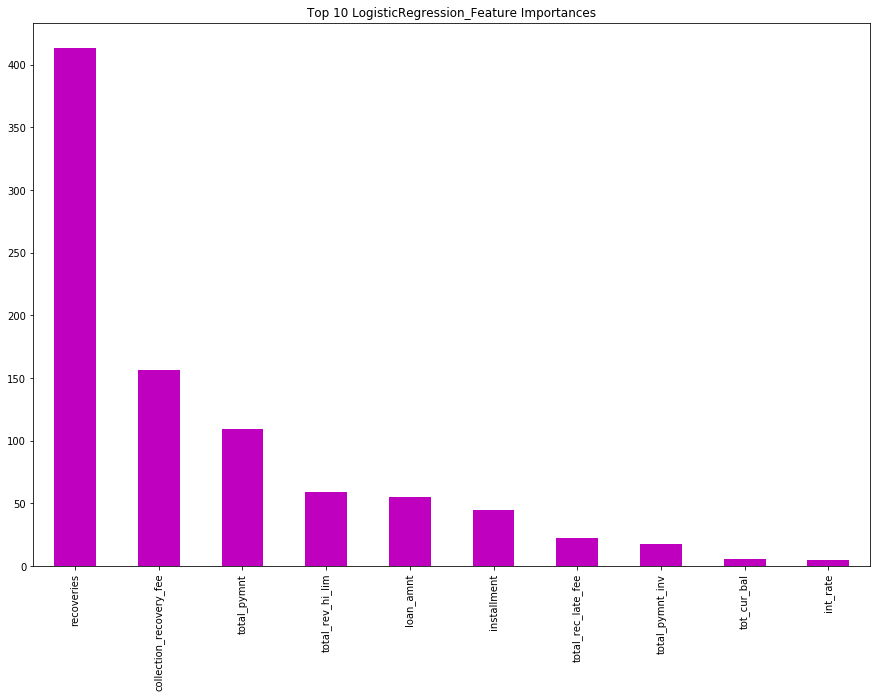

In [119]:
#Ploting Important Features
plt.figure(figsize=(15,10))
plt.title('Top 10 LogisticRegression_Feature Importances')
feat_importances = pd.Series(logmodel_f.coef_[0], index=X_train.columns)
feat_impor = feat_importances.sort_values(ascending=True)
feat_impor.nlargest(10).plot(kind='bar',color='m')

In [120]:
cross_val_test = cross_val_score(logmodel_f,X=test_features,y=test_target,cv=5)

In [121]:
cross_val_test

array([0.92283897, 0.99976653, 0.99980544, 0.9996887 , 0.99988326])

In [122]:
CV_average_test = cross_val_test.mean()

In [123]:
CV_average_test

0.9843965802600657

### For Metrics Comparison - Train data(test & train set has been fitted & Predicted to get the metrics like Precision, recall,f1 scores)

In [124]:
#Predicting the train(test set) have to check
predictions_t=logmodel_gs.predict(X_test)

In [125]:
##Calculating important metrics Precision score,Recall score,F1_Score
precision_score_t = m.precision_score(y_test,predictions_t)
Recall_score_t = m.recall_score(y_test,predictions_t)
F1_score_t = m.f1_score(y_test,predictions_t)
Recall_score_t

0.9236099081933137

In [126]:
Accuracy_t = m.accuracy_score(y_test,predictions_t)
Accuracy_t

0.3825570135897693

In [127]:
Balanced_Accuracy_t = m.balanced_accuracy_score(y_test,predictions_t)
Balanced_Accuracy_t

0.6304820067526095

In [128]:
ROC_AUC_score_t = m.roc_auc_score(y_test,predictions_t)

In [129]:
from sklearn.metrics import roc_curve
fpr_t,tpr_t,thresholds_t=roc_curve(y_test,predictions_t)

In [130]:
cm_t =  m.confusion_matrix(y_test,predictions_t)
tn_t,fp_t,fn_t,tp_t = cm_t.ravel()

In [131]:
#Prevalence
prevalence_t = (tn_t+fn_t) / (tn_t+fp_t+fn_t+tp_t)
(prevalence_t)

0.31723262880229725

In [132]:
#True Negative Rate | Specificity
Specificity_t = tn_t / (tn_t + fp_t)
(Specificity_t)

0.3373541053119053

In [133]:
#True Positive Rate | Recall | Sensitivity
Sensitivity_t = tp_t / (tp_t + fn_t)
(Sensitivity_t)

0.9236099081933137

In [134]:
##Cross Validating with training set 
cross_val_train = cross_val_score(logmodel_f,X=X_train_r,y=y_train_r,cv=5)

In [135]:
cross_val_train

array([0.98717516, 0.9931926 , 0.99291524, 0.99342776, 0.99301172])

In [136]:
CV_average_train = cross_val_train.mean()

In [137]:
CV_average_train

0.9919444950826858

## Metrics Comparison Train Vs Test Dataset

In [138]:
t_data = {'Metrics':['Cv_Average','Balanced_Accuracy','Recall_score','precision_score','F1_score','Sensitivity','Specificity','prevalence','ROC_AUC_score'],
          'train_data_score':[CV_average_train,Balanced_Accuracy_t,Recall_score_t,precision_score_t,F1_score_t,Sensitivity_t,Specificity_t,prevalence_t,ROC_AUC_score_t],
          'test_data_Score':[CV_average_test,Balanced_Accuracy,Recall_score,precision_score,F1_score,Sensitivity,Specificity,prevalence,ROC_AUC_score]}

In [139]:
final_model = pd.DataFrame(data=t_data)

In [140]:
final_model['Diff'] = final_model['test_data_Score'] - final_model['train_data_score']

In [141]:
final_model.sort_values(by=['test_data_Score'],inplace=True,ascending=False)

In [142]:
final_model

,Metrics,train_data_score,test_data_Score,Diff
0,Cv_Average,0.991944,0.984397,-0.007548
2,Recall_score,0.923610,0.784566,-0.139044
5,Sensitivity,0.923610,0.784566,-0.139044
1,Balanced_Accuracy,0.630482,0.614735,-0.015747
8,ROC_AUC_score,0.630482,0.614735,-0.015747
6,Specificity,0.337354,0.444904,0.107550
7,prevalence,0.317233,0.444626,0.127394
4,F1_score,0.187438,0.003412,-0.184026
3,precision_score,0.104303,0.001710,-0.102593


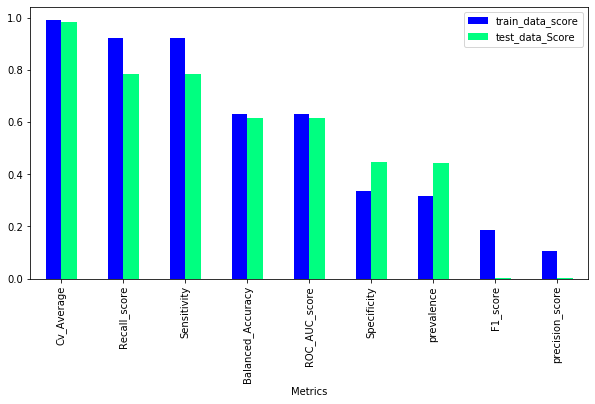

In [143]:
final_model.plot(x='Metrics',y=['train_data_score','test_data_Score'],figsize=(10,5),kind='bar',cmap='winter')

## Conclusion

### In the final model run with test dataset, "Recall_score" is 0.78, and there is list of important features helps Underwritter to decide whether approve or reject the loan application.